In [75]:
from nltk.tokenize.casual import casual_tokenize
import gensim
from gensim import corpora
import re
import pandas as pd
import numpy as np
from string import punctuation
from gensim.models import CoherenceModel
import os

input_filepath="../../data/processed/"
filename="trisma2016_cleaned_text_by_lga.csv"

In [80]:
target = pd.read_csv(input_filepath+"cleaned_target.csv")
nswdf_target = target[(target["Type"]=='Rate per 100,000 population') & (target['Year'] == 2016)].dropna()
nswdf_target = nswdf_target[['LGA', 'Assault - domestic violence', 'Assault - non-domestic violence', 'Fraud', 'Sexual Offences', 'Malicious damage to property', 'Prohibited weapons offences',]]

In [85]:
target = pd.read_csv(input_filepath+"cleaned_target.csv")
nswdf_target = target[(target["Type"]=='Rate per 100,000 population') & (target['Year'] == 2016)].dropna()
nswdf_target = nswdf_target[['LGA', 'Assault - domestic violence', 'Assault - non-domestic violence', 'Fraud', 'Sexual Offences', 'Malicious damage to property', 'Prohibited weapons offences',]]
nswdf_target = nswdf_target.set_index("LGA")
nswdf_target = np.log(nswdf_target)
nswdf_target

,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences
LGA,,,,,,
Albury,6.299733,6.334338,6.263887,5.378146,7.181636,5.756704
Armidale Regional,6.217540,6.481927,6.734923,5.398352,7.703918,5.659568
Ballina,5.544054,5.772687,6.223344,5.042361,6.678706,5.027093
Bathurst Regional,6.084028,6.136396,6.531605,5.300932,7.076881,5.422629
Bayside,5.755702,5.613635,6.590862,4.448712,6.371043,4.687338
Bega Valley,5.743838,5.833989,5.762531,5.031643,6.697170,5.031643
Bellingen,5.632005,5.574846,5.514222,4.756536,6.405194,4.533393
Berrigan,5.164719,4.941576,5.095726,4.402579,6.551014,5.634723
Blacktown,6.387513,6.116154,6.710620,5.099780,6.888318,5.002186


In [4]:


tweetdf=pd.read_csv(os.path.join(input_filepath, filename),header=0)
tweetdf

,Unnamed: 0,lga,text,cleaned
0,0,Albury,#2015bestnine🌟 #BestOfNine2015 #byebye #2015 #...,#2015bestnine #bestofnine2015 #byebye #2015 #h...
1,1,Armidale Regional,Tranquility in the Park. @ Moore Park Inn Bout...,tranquility in the park moore park inn boutiqu...
2,2,Ballina,Happy New Year to all my pals back home in the...,happy new year to all my pals back home in the...
3,3,Balranald,Crackin night on the river. https://t.co/lGYg4...,crackin night on the river just posted photo o...
4,4,Bathurst Regional,@ReneeYoungWWE Happy New Year to you &amp; you...,happy new year to you your fam as well miss mi...
5,5,Bayside,@tamasys @mattRan wtf is maths circus? @toddjt...,wtf is maths circus sounds like it must've bee...
6,6,Bega Valley,Suns out guns out. Coffee time. #crossfitgirls...,suns out guns out coffee time #crossfitgirls #...
7,7,Bellingen,More from the Promised Lands #normanheywood #l...,more from the promised lands #normanheywood #l...
8,8,Berrigan,@MoniqueAnnalyss hotttt 🔥🔥🔥 @MoniqueAnnalyss a...,hottt appreciate your hotness monique it's 201...
9,9,Blacktown,Ahhh Tumblr. I currently have a hammock in the...,ahhh tumblr currently have hammock in the livi...


In [5]:
#now split by various doc types and run LGA. DO i need to write out interim files? Not really, not yet

by_lga = tweetdf

In [6]:
#by_lga.apply(lambda x: len(x['text']), axis=1)

In [15]:
punc_regex = re.compile('[%s]' % re.escape(punctuation))

#finds best ntopics
def run_lda(text_series, start, step, stop):
    toks = [x.split(" ") for x in text_series] # join into a 2d list
    
    dictionary = corpora.Dictionary(toks)

    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in toks]

    Lda = gensim.models.ldamodel.LdaModel

    # Running and Trainign LDA model on the document term matrix.
    #ldamodel = Lda(doc_term_matrix, num_topics=num_topics, id2word = dictionary, passes=50)
    #return ldamodel
    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=toks, start=start, limit=stop, step=step)
    return model_list, coherence_values



In [16]:
## reference: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#17howtofindtheoptimalnumberoftopicsforlda

def compute_coherence_values(dictionary, corpus, texts, start, step, limit):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=50)
        print(".")
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [18]:
start, step, stop = (300, 100, 601)
ldams, coh = run_lda(by_lga['text'], start, step, stop)



/Users/tdm/git/capstone/venv/lib/python3.6/site-packages/gensim/models/ldamodel.py:775: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


KeyboardInterrupt: 

In [106]:
toks = [x.split(" ") if (not pd.isnull(x)) else [] for x in by_lga["cleaned"] ]
dictionary = corpora.Dictionary(toks)
corpus = [dictionary.doc2bow(doc) for doc in toks]

model = gensim.models.ldamodel.LdaModel(corpus, num_topics=300, id2word = dictionary, passes=50)

/Users/tdm/git/capstone/venv/lib/python3.6/site-packages/gensim/models/ldamodel.py:775: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [29]:
import pickle
with open("lgaldamodel.pk", 'wb') as f:
    pickle.dump(model, f)

OSError: [Errno 22] Invalid argument

In [34]:
model.show_topics(100)

[(99,
  '0.021*"M1" + 0.020*"https://t.co/STICnu1vOc" + 0.015*"the" + 0.014*"Hawkesbury" + 0.014*"is" + 0.011*"The" + 0.011*"clear." + 0.011*"earlier" + 0.011*"to" + 0.010*"BREAKDOWN"'),
 (83,
  '0.000*"the" + 0.000*"to" + 0.000*"a" + 0.000*"I" + 0.000*"is" + 0.000*"in" + 0.000*"and" + 0.000*"for" + 0.000*"of" + 0.000*"at"'),
 (92,
  '0.001*"better��" + 0.000*"https://t.co/k5Gi7JI5Ls" + 0.000*"@ducatinewstoday" + 0.000*"https://t.co/mszIGTMvEE" + 0.000*"https://t.co/Oj4ETR2Bcl" + 0.000*"Karmazin" + 0.000*"........................................is" + 0.000*"https://t.co/dlcEG0TlHy" + 0.000*"https://t.co/ADHOKbV29c" + 0.000*"@MTycherou"'),
 (120,
  '0.001*"Dungog," + 0.001*"https://t.co/SFoZCqBeMC" + 0.001*"castrated" + 0.001*"@Melison_model" + 0.001*"https://t.co/yjktA2xZHm" + 0.001*"Wogan" + 0.000*"#like" + 0.000*"#seaside" + 0.000*"@MercedesAMGF1" + 0.000*"https://t.co/g2J0jIC0LO"'),
 (104,
  '0.000*"the" + 0.000*"Rain" + 0.000*"today" + 0.000*"Wind" + 0.000*"mm." + 0.000*"0.0" + 0.0

In [37]:
model.save("lgaldamodel.pk")

In [97]:
model = gensim.models.ldamodel.LdaModel.load("lgaldamodel.pk")

In [43]:
model.top_topics(corpus)

[([(0.00029454436, '#S2S'),
   (0.00029454436, 'https://t.co/Bc9KeakZCp'),
   (0.00029454436, 'sort,'),
   (0.00029454436, 'https://t.co/GvixdgCEQF'),
   (0.00029454436, 'https://t.co/i01AKjf6sI'),
   (0.00029454436, '@Woodleafarms…'),
   (0.00029454436, '@Mary_Raynes'),
   (0.00029454433, 'https://t.co/bSKJqnThk0'),
   (0.00029454433, 'https://t.co/9gHqcU8vDq'),
   (0.0002945443, '@Anonylox'),
   (0.0002945443, 'Office:'),
   (0.0002945443, 'Jindera).'),
   (0.00029454415, 'flowers...'),
   (0.00029454412, 'https://t.co/gYi4enPWDg'),
   (0.00029454412, 'amazed,'),
   (0.00029454412, 'https://t.co/na0oT33LZs'),
   (0.00029454406, 'https://t.co/927tcCaIOv'),
   (0.00029454406, '06:09'),
   (0.00029454372, 'Gerogery,'),
   (0.0002945437, 'https://t.co/PnJXS6M4Uv')],
  1.3100009964825002e-10),
 ([(0.00086490315, 'https://t.co/bOAsOpJkhi'),
   (0.0005769221, 'Pidgeot'),
   (0.00057692203, 'potatoes….'),
   (0.00057692203, '🐾☺️'),
   (0.00057692203, 'catalyst/quantum)?'),
   (0.00057692203,

In [53]:
#classify lgas
inferred = model.inference(corpus)
inferred = inferred[0]

In [57]:
import numpy as np
inferdf = pd.DataFrame(inferred)


In [61]:
inferdf.index = by_lga.lga
inferdf

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
lga,,,,,,,,,,,,,,,,,,,,,
Albury,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,...,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333
Armidale Regional,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,...,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,2.145511,0.003333,0.003333,0.003333
Ballina,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,...,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,29.227444,0.003333,0.003333,0.003333
Balranald,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,448.948120,0.003333,0.003333,...,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333
Bathurst Regional,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,...,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333
Bayside,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,...,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333
Bega Valley,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,...,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333
Bellingen,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,...,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,211.196976,0.003333,0.003333,0.003333
Berrigan,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,...,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333


In [105]:
inferdf.to_csv(input_filepath+"ldabylgatrisma2016.csv")

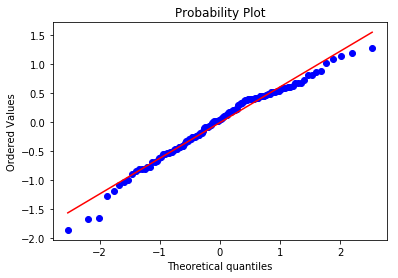

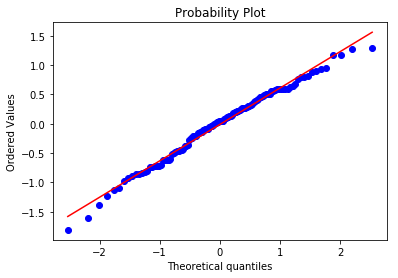

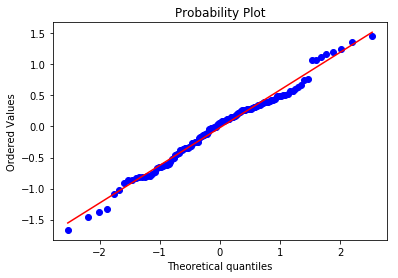

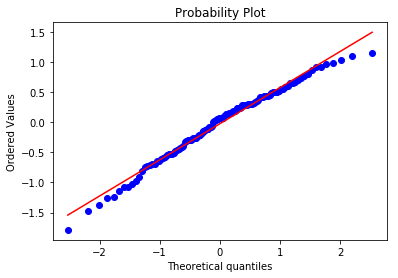

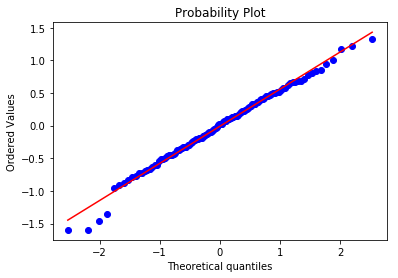

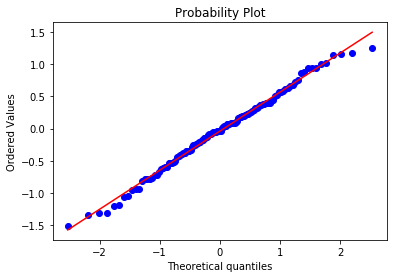

In [100]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import probplot
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize

def kfold_cv(k, crimenum, dataframe, target):
    lga_names = target.index
    start_col = target.columns.get_loc('Assault - domestic violence')
    kf = KFold(n_splits=5, shuffle=True)
    models = []
    rmse = []
    r2 = []
    allpreds = target.iloc[0:0]
    allpreds["preds"] = pd.Series()
    output = pd.DataFrame(index=range(len(dataframe)))
    for train_index, test_index in kf.split(lga_names):
        train_lgas = lga_names[train_index]
        traindf = dataframe.loc[train_lgas]
        train_target = target.loc[train_lgas]
        
        test_lgas = lga_names[test_index]
        testdf = dataframe.loc[test_lgas]
        test_target = target.loc[test_lgas].copy()
        #import pdb; pdb.set_trace()
        model = RandomForestRegressor()
        model.fit(normalize(traindf), train_target.iloc[:,start_col+crimenum])
        models.append(model)
        #print(lga_loc)
        preds = model.predict(normalize(testdf))
        test_target["preds"] = preds
        #import pdb; pdb.set_trace()
        allpreds = pd.concat([allpreds, test_target])
        #is this a fair measure
        rmse.append(np.sqrt(mean_squared_error(preds, test_target.iloc[:,start_col+crimenum])))
        r2.append(r2_score(test_target.iloc[:,start_col+crimenum], preds))

    probplot(allpreds.iloc[:,start_col+crimenum] - allpreds.iloc[:,-1], dist='norm', plot=plt)
    #import pdb; pdb.set_trace()
    plt.show()
   
    rmse.append(np.sqrt(mean_squared_error(allpreds["preds"], allpreds.iloc[:,start_col+crimenum])))
    r2.append(r2_score(allpreds.iloc[:,start_col+crimenum], allpreds["preds"]))
    return output, rmse, r2, models, allpreds

outputs = []
for i in range(6):
    outputs.append(kfold_cv(5, 0, inferdf, nswdf_target))
    outputs[-1][1:3]

In [101]:
for i in range(len(outputs)):
    print(nswdf_target.columns[i])
    print("r2: ",outputs[i][2])
    print("rmse: ",outputs[i][1])

Assault - domestic violence
r2:  [-0.16736296510019066, 0.24969744915227443, 0.051075147121760645, -0.19465071514644894, -0.013514355238617659, 0.040687081106476675]
rmse:  [0.66114967479613, 0.5069569030891814, 0.6037505896968309, 0.624940295736769, 0.6439736278619005, 0.6105557100296829]
Assault - non-domestic violence
r2:  [0.15837509582575127, -0.09352062376773418, -0.3180080933874827, -0.16611285203352266, 0.18183316635528213, 0.027471448358638573]
rmse:  [0.5155838023021433, 0.4820620083251682, 0.6330371830353547, 0.7701386153821452, 0.63048284024365, 0.6147468765136745]
Fraud
r2:  [-0.019967785189629605, 0.08074351267405566, 0.10961990126920473, -1.0196214820734837, 0.2637504716799304, 0.06917913413610055]
rmse:  [0.6429538662783298, 0.554072821516848, 0.5994119658192272, 0.6586425672279494, 0.5431775097493995, 0.6014204700432713]
Sexual Offences
r2:  [0.3640823332572325, -0.5777641054509939, -0.12049775574141997, 0.005704878132856472, 0.21861669130695693, 0.08707528717496182]
r

In [102]:
imp = []
for i, output in enumerate(outputs):
    imp.append(np.zeros(300))
    for mod in output[3]:
        imp[-1] = imp[-1] + mod.feature_importances_
   

In [104]:
#for each target get most important topics
for i, importvec in enumerate(imp):
    print(nswdf_target.columns[i])
    top10 = np.argsort(importvec)[-10:]
    for j in top10:
        print(model.show_topic(j))
        

Assault - domestic violence
[('the', 0.02686654), ('to', 0.018986193), ('a', 0.016861826), ('of', 0.01193077), ('and', 0.011371217), ('in', 0.011186093), ('I', 0.009852552), ('for', 0.009473195), ('you', 0.0077860993), ('is', 0.00774266)]
[('at', 0.019395987), ('the', 0.015939591), ('NSW', 0.013259457), ('2016', 0.012779353), ('to', 0.010972102), ('a', 0.009879672), ('https://t.co/eZ1btQ7mTC', 0.00971782), ('Fire.', 0.009184353), ('#NSWRFS', 0.00885982), ('in', 0.0084838215)]
[('the', 0.024827428), ('@', 0.01946787), ('a', 0.018002212), ('in', 0.015646787), ('of', 0.014740214), ('to', 0.014446434), ('Blue', 0.01196658), ('Mountains', 0.008662943), ('I', 0.007946573), ('is', 0.007328172)]
[('today', 0.032852724), ('Rain', 0.03243294), ('Wind', 0.03239033), ('km/h', 0.032248646), ('Temperature', 0.032243315), ('Humidity', 0.0322371), ('mm.', 0.032234233), ('Barometer', 0.03223272), ('hPa,', 0.032231964), ('°C.', 0.032231636)]
[('the', 0.029153554), ('to', 0.01687482), ('a', 0.016309101),

[('the', 0.025515929), ('to', 0.021333946), ('a', 0.019739747), ('I', 0.016325584), ('in', 0.013463509), ('of', 0.012438776), ('and', 0.010472717), ('for', 0.009376953), ('is', 0.008640599), ('on', 0.0079719005)]
[('the', 0.025640914), ('to', 0.020387407), ('a', 0.017593753), ('I', 0.0139094535), ('and', 0.012350896), ('of', 0.011207191), ('in', 0.010694461), ('is', 0.010645284), ('for', 0.009696147), ('you', 0.008474594)]
[('the', 0.021310462), ('of', 0.021049976), ('@ellymelly', 0.017239274), ('a', 0.015415564), ('to', 0.011723669), ('@stiffleaf', 0.010749276), ('and', 0.008369316), ('@PoorFrankRaw', 0.008252378), ('in', 0.007613188), ('for', 0.0066999123)]
[('the', 0.02947543), ('a', 0.022736609), ('to', 0.021818679), ('I', 0.021577803), ('is', 0.0126913125), ('of', 0.01257679), ('you', 0.010175761), ('and', 0.010058351), ('in', 0.009887709), ('it', 0.009195653)]
Malicious damage to property
[('today', 0.032852724), ('Rain', 0.03243294), ('Wind', 0.03239033), ('km/h', 0.032248646), 

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
x = range(start, stop, step)
plt.plot(x, coh)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()